In [11]:
from spot2intensity import Point, Rectangle, Grid, plot_patches,create_patches,create_circle_patches, rectangle_reshape
import matplotlib.pyplot as plt
import cv2
import copy
import numpy as np

In [12]:
select_collection = "180124_N22_Cal"

In [13]:
directory = ["180124_N21_Pan","180124_E14_X31","180124_N22_Cal","180124_N23_X31","180124_E15_X31"]

images_paths = ["180124_N21_Pan.gif",
                '180124_E14_X31_Allantois_100_600_635_635_2_635.gif',
                '180124_N22_Cal_100_600_635_635_635.gif',
                '180124_N23_X31_100_600_635_635_635_635.gif',
                '180124_E15_X31_100_600_635_635.gif',
               ]
images_paths_jpg  = [im_path.replace('.gif','.jpg') for im_path in images_paths]
fpath_dict = dict(zip(directory,images_paths_jpg))
fpath_dict = {key:'data/'+key+'/'+value for key,value in fpath_dict.iteritems()}


In [14]:
#################################
rec_N23_1 = [(336, 321),
            (354, 1831),
            (1959, 1853),
            (1968, 312),
            ]

rec_N23_2 = [(328, 2858),
            (332, 4385),
            (1946, 4403),
            (1960, 2873),
            ]

rec_N23_3 = [(321, 5251),
            (310, 6763),
            (1929, 6789),
            (1941, 5255),
            ]
##############################
rec_N22_1 = [(310, 314),
            (323, 1846),
            (1928, 1831),
            (1931, 304),
           ]

rec_N22_2 = [(321, 2873),
            (337, 4399),
            (1951, 4382),
            (1926, 2869),
           ]
rec_N22_3 = [(311, 5254),
            (349, 6768),
            (1944, 6766),
            (1959, 5239),
                       ]
#############################
rec_N21_1 = [(296, 244),
           (314, 1746),
           (1903, 1766),
           (1912, 207),
            ]

rec_N21_2 = [(303, 2791),
             (298, 4303),
             (1922, 4293),
             (1908, 2786),
            ]

rec_N21_3 = [(302, 5164),
             (297, 6680),
             (1923, 6701),
             (1910, 5158),
            ]

In [15]:
def find_circle_coordinates(image,x0,y0):
    pic=copy.deepcopy(image)
    pic[pic > 120] = 0
    pic[pic < 1] = 0
    edges = feature.canny(pic,sigma=0.5)
 
    # Detect two radii
    hough_radii = np.arange(40, 80, 2)

    hough_res = hough_circle(edges, hough_radii)

    # Select the most prominent  circle:
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,min_xdistance = hough_radii.min() , min_ydistance = hough_radii.min(),
                                               total_num_peaks=1)
    
    return cy[0]+y0, cx[0]+x0,radii[0], accums[0]


In [16]:
from skimage import feature
from skimage import  color
from skimage.transform import hough_circle, hough_circle_peaks
#from skimage.draw import circle_perimeter, ellipse_perimeter


(334, 153)
(515, 152)
(696, 151)
(878, 150)
(1059, 149)
(1240, 148)
(1422, 147)
(1603, 146)
(1784, 145)
(1966, 144)
(336, 321)
(517, 320)
(698, 319)
(880, 318)
(1061, 317)
(1242, 316)
(1424, 315)
(1605, 314)
(1786, 313)
(1968, 312)
(338, 488)
(519, 487)
(700, 486)
(882, 485)
(1063, 484)
(1244, 483)
(1426, 482)
(1607, 481)
(1788, 480)
(1970, 479)
(340, 656)
(521, 655)
(702, 654)
(884, 653)
(1065, 652)
(1246, 651)
(1428, 650)
(1609, 649)
(1790, 648)
(1972, 647)
(342, 824)
(523, 823)
(704, 822)
(886, 821)
(1067, 820)
(1248, 819)
(1430, 818)
(1611, 817)
(1792, 816)
(1974, 815)
(344, 992)
(525, 991)
(706, 990)
(888, 989)
(1069, 988)
(1250, 987)
(1432, 986)
(1613, 985)
(1794, 984)
(1976, 983)
(346, 1159)
(527, 1158)
(708, 1157)
(890, 1156)
(1071, 1155)
(1252, 1154)
(1434, 1153)
(1615, 1152)
(1796, 1151)
(1978, 1150)
(348, 1327)
(529, 1326)
(710, 1325)
(892, 1324)
(1073, 1323)
(1254, 1322)
(1436, 1321)
(1617, 1320)
(1798, 1319)
(1980, 1318)
(350, 1495)
(531, 1494)
(712, 1493)
(894, 1492)
(107

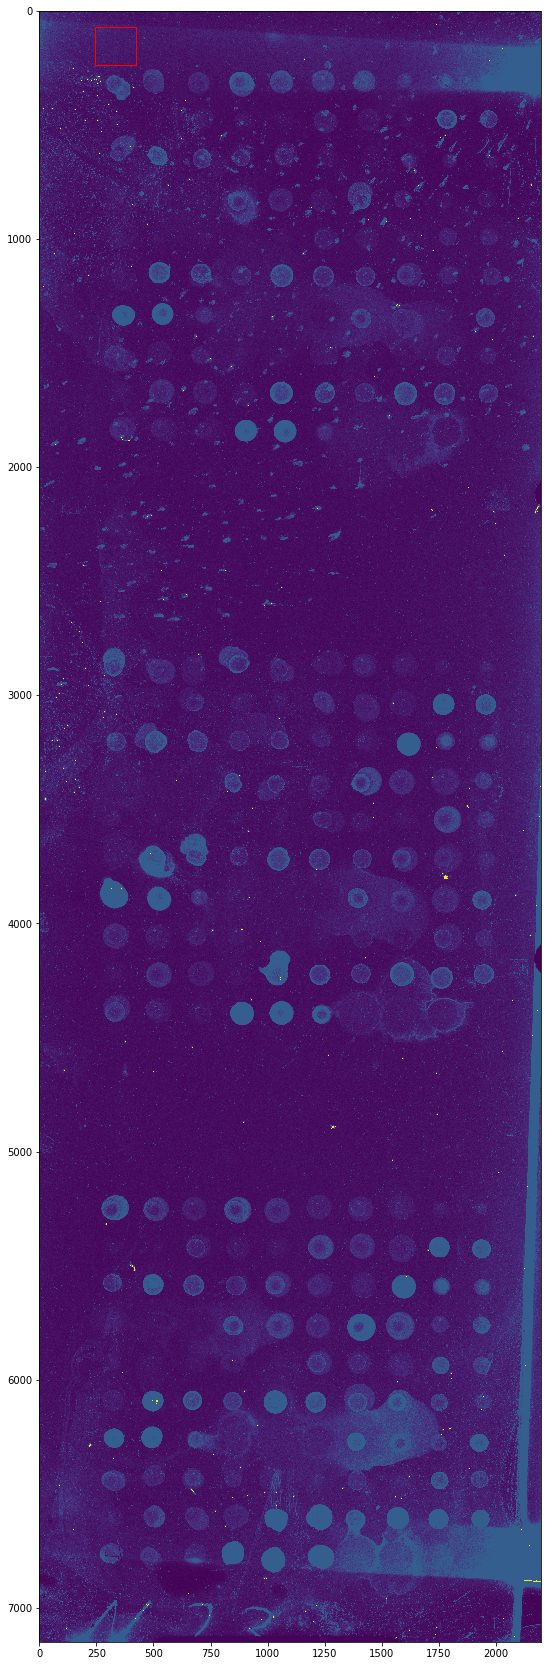

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


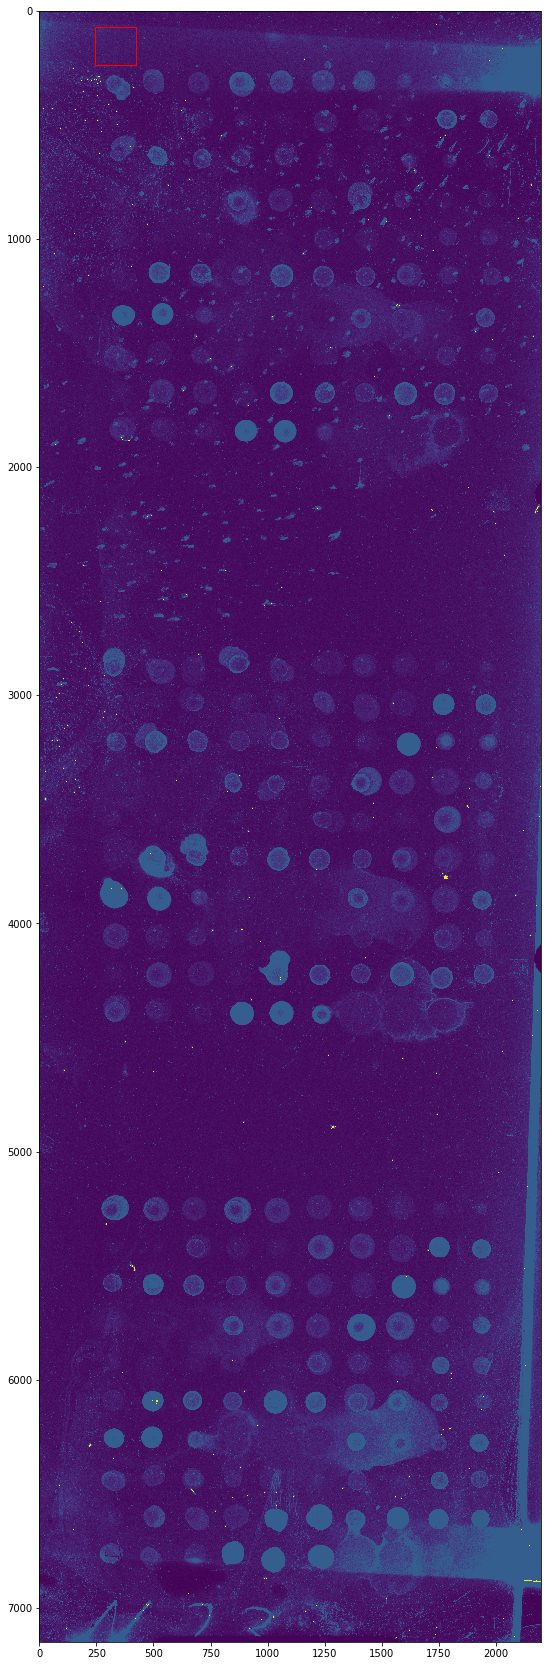

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


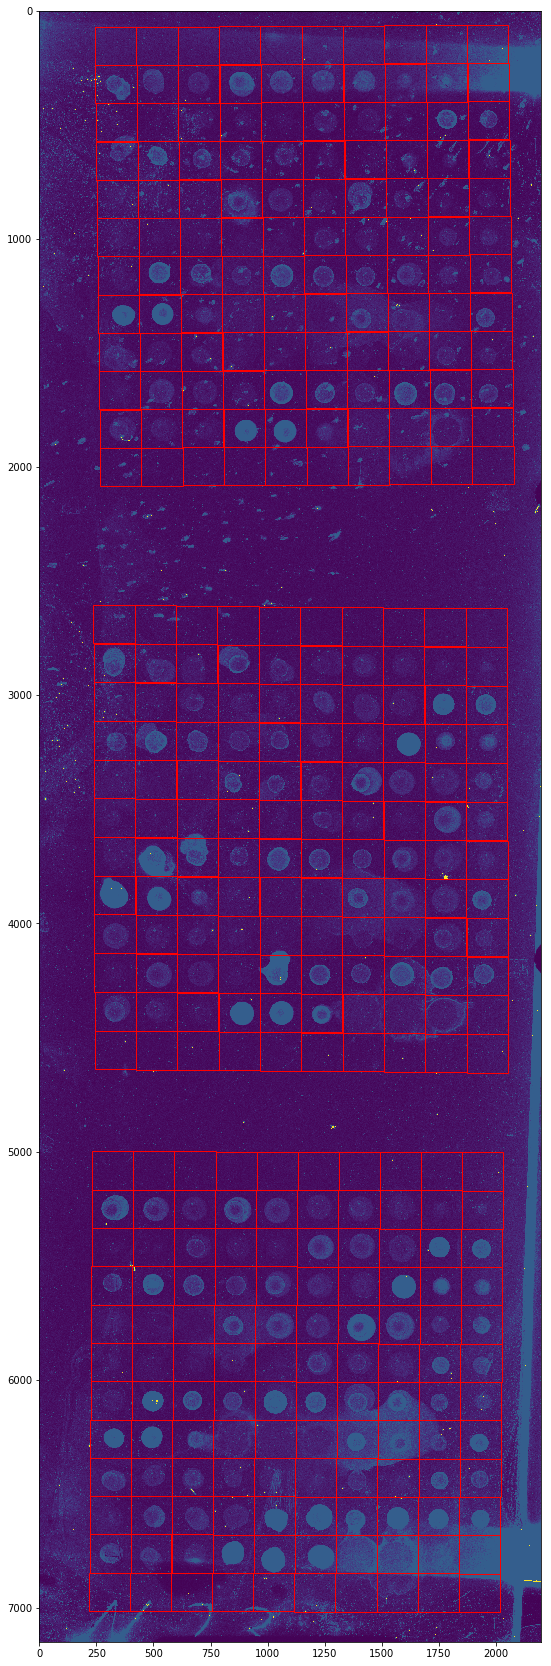

In [24]:
select_collection = "180124_N23_X31"

rect1 = Rectangle(*tuple(Point(x,y) for x,y in rec_N23_1))
rect2 = Rectangle(*tuple(Point(x,y) for x,y in rec_N23_2))
rect3 = Rectangle(*tuple(Point(x,y) for x,y in rec_N23_3))
shape = Point(10,10)
grid1 = Grid(rectangle = rect1, shape = shape)
grid2 = Grid(rectangle = rect2, shape = copy.deepcopy(shape))
grid3 = Grid(rectangle = rect3, shape = copy.deepcopy(shape))

imag = cv2.imread(fpath_dict[select_collection],0)


fig,ax = plt.subplots(1, figsize=(30,30))
ax.imshow(imag)

intensities = []
intensities2 = []

spot_images = []
circles = []
circle_qual = []
xy = []
grid4 = copy.deepcopy(grid3)
grid4.add_row(where="top")
grid4.add_row(where="bottom")

for grid in [grid1,grid2,grid3]:
    grid.add_row(where="top")
    grid.add_row(where="bottom")
    for x,y in grid.points:
        delta_x = int(grid.abs_horizontal_spacing)
        delta_y = int(grid.abs_vertical_spacing)
        x = int(x)
        y = int(y)
        xy.append((x,y))
        rec = create_patches((x,y),delta_x,delta_y)
        ax.add_patch(rec)
        x0,y0 = rec.xy
        
        x0 = int(x0)
        y0 = int(y0)
        if x0 < 0:
            x0 = 0
        if y0 < 0:
            y0 = 0
        
        
        spot_imag= imag[y0:y0+delta_x ,x0:x0+delta_x]
        spot_images.append(spot_imag)
        intensities.append(spot_imag.sum())
        #circx,circy,radius, accums = find_circle_coordinates(spot_imag,0,0)
        #circle_qual.append(accums)
        
        
        #circ = create_circle_patches((circy,circx),radius)
        #ax.add_patch(circ)
        #intensity2 = np.mean([value for index,value in np.ndenumerate(spot_imag) if circ.contains_point(index)])   
        #intensities.append(intensity2)
        #circle_qual.append(accums)
        print(x,y)
        
    
plt.show()


[]


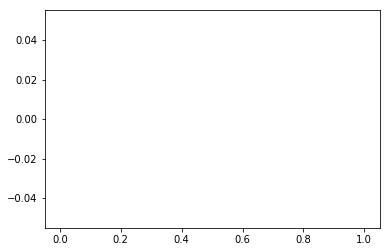

In [25]:
print(circle_qual)
plt.hist(np.array(circle_qual),60)
plt.show()

In [27]:

pic = spot_images[11]
circy,circx,radius,qual = find_circle_coordinates(pic,0,0)
circ = create_circle_patches((circx,circy),radius)


TypeError: __init__() takes at least 2 arguments (2 given)

In [112]:
ix = np.ndindex(pic.shape)
circ.contains_point(ix)

TypeError: 'ndindex' object does not support indexing

In [141]:
import timeit

np.mean([value for index,value in np.ndenumerate(pic) if circ.contains_point(index)])


31.385862859157413

(101, 108)


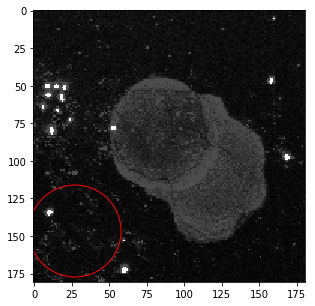

In [166]:
import timeit
pic = spot_images[10]
fig, ax =  plt.subplots(1, figsize=(5,5))
circy, circx,radius, accums = find_circle_coordinates(pic,0,0)
print(circy, circx)
#np.mean([value for index,value in np.ndenumerate(pic) if contained_in_circle(circx,circy,radius)])
circ = create_circle_patches((75,75),radius,transform=None)
ax.imshow(pic,cmap=plt.cm.gray)
ax.add_patch(circ)
plt.show()

In [ ]:
def calc_intensity(pic):
    result = 0
    (Np, Nq) = pic.shape
    for p in range(Np):
        for q in range(Nq):
            # zero indexed
            value = pic[p,q]
            if ( r**2 <= (x0-p)**2 + (y0-q)**2 ):
                result += value
    return result

In [133]:
def contained_in_circle(x0,x,y0,y,r):
    return r**2 <= (x0-x)**2 + (y0-y)**2

In [132]:
k = 0
for index,value in np.ndenumerate(pic):
    print(k)
    print(index, value)
    k+=1

0
((0, 0), 15)
1
((0, 1), 6)
2
((0, 2), 17)
3
((0, 3), 10)
4
((0, 4), 28)
5
((0, 5), 13)
6
((0, 6), 15)
7
((0, 7), 16)
8
((0, 8), 7)
9
((0, 9), 17)
10
((0, 10), 15)
11
((0, 11), 11)
12
((0, 12), 8)
13
((0, 13), 18)
14
((0, 14), 17)
15
((0, 15), 10)
16
((0, 16), 14)
17
((0, 17), 6)
18
((0, 18), 20)
19
((0, 19), 19)
20
((0, 20), 16)
21
((0, 21), 16)
22
((0, 22), 11)
23
((0, 23), 22)
24
((0, 24), 15)
25
((0, 25), 4)
26
((0, 26), 15)
27
((0, 27), 8)
28
((0, 28), 12)
29
((0, 29), 12)
30
((0, 30), 13)
31
((0, 31), 20)
32
((0, 32), 13)
33
((0, 33), 21)
34
((0, 34), 14)
35
((0, 35), 10)
36
((0, 36), 19)
37
((0, 37), 21)
38
((0, 38), 12)
39
((0, 39), 8)
40
((0, 40), 14)
41
((0, 41), 19)
42
((0, 42), 19)
43
((0, 43), 17)
44
((0, 44), 18)
45
((0, 45), 6)
46
((0, 46), 13)
47
((0, 47), 12)
48
((0, 48), 9)
49
((0, 49), 17)
50
((0, 50), 19)
51
((0, 51), 14)
52
((0, 52), 11)
53
((0, 53), 7)
54
((0, 54), 25)
55
((0, 55), 10)
56
((0, 56), 10)
57
((0, 57), 19)
58
((0, 58), 14)
59
((0, 59), 17)
60
((0, 60

1410
((7, 143), 10)
1411
((7, 144), 21)
1412
((7, 145), 15)
1413
((7, 146), 13)
1414
((7, 147), 21)
1415
((7, 148), 14)
1416
((7, 149), 14)
1417
((7, 150), 7)
1418
((7, 151), 9)
1419
((7, 152), 6)
1420
((7, 153), 12)
1421
((7, 154), 15)
1422
((7, 155), 20)
1423
((7, 156), 12)
1424
((7, 157), 24)
1425
((7, 158), 16)
1426
((7, 159), 13)
1427
((7, 160), 21)
1428
((7, 161), 12)
1429
((7, 162), 20)
1430
((7, 163), 15)
1431
((7, 164), 9)
1432
((7, 165), 16)
1433
((7, 166), 10)
1434
((7, 167), 12)
1435
((7, 168), 22)
1436
((7, 169), 19)
1437
((7, 170), 15)
1438
((7, 171), 12)
1439
((7, 172), 19)
1440
((7, 173), 12)
1441
((7, 174), 20)
1442
((7, 175), 18)
1443
((7, 176), 15)
1444
((7, 177), 15)
1445
((7, 178), 6)
1446
((7, 179), 21)
1447
((7, 180), 25)
1448
((8, 0), 12)
1449
((8, 1), 13)
1450
((8, 2), 15)
1451
((8, 3), 22)
1452
((8, 4), 8)
1453
((8, 5), 10)
1454
((8, 6), 13)
1455
((8, 7), 20)
1456
((8, 8), 21)
1457
((8, 9), 22)
1458
((8, 10), 10)
1459
((8, 11), 13)
1460
((8, 12), 20)
1461
((8,

((11, 14), 11)
2006
((11, 15), 7)
2007
((11, 16), 11)
2008
((11, 17), 12)
2009
((11, 18), 15)
2010
((11, 19), 14)
2011
((11, 20), 11)
2012
((11, 21), 12)
2013
((11, 22), 6)
2014
((11, 23), 6)
2015
((11, 24), 15)
2016
((11, 25), 5)
2017
((11, 26), 13)
2018
((11, 27), 9)
2019
((11, 28), 15)
2020
((11, 29), 26)
2021
((11, 30), 14)
2022
((11, 31), 13)
2023
((11, 32), 16)
2024
((11, 33), 12)
2025
((11, 34), 14)
2026
((11, 35), 8)
2027
((11, 36), 10)
2028
((11, 37), 10)
2029
((11, 38), 14)
2030
((11, 39), 12)
2031
((11, 40), 12)
2032
((11, 41), 8)
2033
((11, 42), 17)
2034
((11, 43), 16)
2035
((11, 44), 12)
2036
((11, 45), 19)
2037
((11, 46), 7)
2038
((11, 47), 10)
2039
((11, 48), 7)
2040
((11, 49), 9)
2041
((11, 50), 11)
2042
((11, 51), 9)
2043
((11, 52), 11)
2044
((11, 53), 12)
2045
((11, 54), 17)
2046
((11, 55), 18)
2047
((11, 56), 16)
2048
((11, 57), 14)
2049
((11, 58), 10)
2050
((11, 59), 7)
2051
((11, 60), 15)
2052
((11, 61), 11)
2053
((11, 62), 8)
2054
((11, 63), 2)
2055
((11, 64), 16)

2912
((16, 16), 18)
2913
((16, 17), 13)
2914
((16, 18), 76)
2915
((16, 19), 14)
2916
((16, 20), 12)
2917
((16, 21), 10)
2918
((16, 22), 10)
2919
((16, 23), 19)
2920
((16, 24), 6)
2921
((16, 25), 20)
2922
((16, 26), 16)
2923
((16, 27), 20)
2924
((16, 28), 16)
2925
((16, 29), 7)
2926
((16, 30), 17)
2927
((16, 31), 15)
2928
((16, 32), 14)
2929
((16, 33), 7)
2930
((16, 34), 15)
2931
((16, 35), 20)
2932
((16, 36), 11)
2933
((16, 37), 4)
2934
((16, 38), 17)
2935
((16, 39), 7)
2936
((16, 40), 5)
2937
((16, 41), 22)
2938
((16, 42), 7)
2939
((16, 43), 16)
2940
((16, 44), 9)
2941
((16, 45), 12)
2942
((16, 46), 8)
2943
((16, 47), 15)
2944
((16, 48), 14)
2945
((16, 49), 22)
2946
((16, 50), 11)
2947
((16, 51), 13)
2948
((16, 52), 13)
2949
((16, 53), 13)
2950
((16, 54), 10)
2951
((16, 55), 14)
2952
((16, 56), 10)
2953
((16, 57), 10)
2954
((16, 58), 21)
2955
((16, 59), 5)
2956
((16, 60), 8)
2957
((16, 61), 11)
2958
((16, 62), 12)
2959
((16, 63), 15)
2960
((16, 64), 16)
2961
((16, 65), 5)
2962
((16, 6

3644
((20, 24), 16)
3645
((20, 25), 13)
3646
((20, 26), 17)
3647
((20, 27), 17)
3648
((20, 28), 15)
3649
((20, 29), 14)
3650
((20, 30), 13)
3651
((20, 31), 11)
3652
((20, 32), 11)
3653
((20, 33), 10)
3654
((20, 34), 11)
3655
((20, 35), 13)
3656
((20, 36), 10)
3657
((20, 37), 11)
3658
((20, 38), 8)
3659
((20, 39), 4)
3660
((20, 40), 22)
3661
((20, 41), 15)
3662
((20, 42), 12)
3663
((20, 43), 22)
3664
((20, 44), 8)
3665
((20, 45), 15)
3666
((20, 46), 9)
3667
((20, 47), 10)
3668
((20, 48), 19)
3669
((20, 49), 7)
3670
((20, 50), 8)
3671
((20, 51), 12)
3672
((20, 52), 13)
3673
((20, 53), 16)
3674
((20, 54), 22)
3675
((20, 55), 18)
3676
((20, 56), 31)
3677
((20, 57), 32)
3678
((20, 58), 28)
3679
((20, 59), 39)
3680
((20, 60), 37)
3681
((20, 61), 28)
3682
((20, 62), 38)
3683
((20, 63), 24)
3684
((20, 64), 27)
3685
((20, 65), 38)
3686
((20, 66), 46)
3687
((20, 67), 44)
3688
((20, 68), 48)
3689
((20, 69), 34)
3690
((20, 70), 33)
3691
((20, 71), 38)
3692
((20, 72), 26)
3693
((20, 73), 45)
3694
(

((24, 87), 38)
4432
((24, 88), 58)
4433
((24, 89), 41)
4434
((24, 90), 56)
4435
((24, 91), 61)
4436
((24, 92), 44)
4437
((24, 93), 53)
4438
((24, 94), 51)
4439
((24, 95), 58)
4440
((24, 96), 32)
4441
((24, 97), 56)
4442
((24, 98), 29)
4443
((24, 99), 24)
4444
((24, 100), 7)
4445
((24, 101), 13)
4446
((24, 102), 9)
4447
((24, 103), 9)
4448
((24, 104), 17)
4449
((24, 105), 10)
4450
((24, 106), 11)
4451
((24, 107), 10)
4452
((24, 108), 10)
4453
((24, 109), 19)
4454
((24, 110), 5)
4455
((24, 111), 17)
4456
((24, 112), 17)
4457
((24, 113), 13)
4458
((24, 114), 11)
4459
((24, 115), 8)
4460
((24, 116), 11)
4461
((24, 117), 8)
4462
((24, 118), 25)
4463
((24, 119), 8)
4464
((24, 120), 18)
4465
((24, 121), 7)
4466
((24, 122), 13)
4467
((24, 123), 4)
4468
((24, 124), 22)
4469
((24, 125), 14)
4470
((24, 126), 10)
4471
((24, 127), 9)
4472
((24, 128), 4)
4473
((24, 129), 11)
4474
((24, 130), 14)
4475
((24, 131), 12)
4476
((24, 132), 13)
4477
((24, 133), 15)
4478
((24, 134), 6)
4479
((24, 135), 9)
44

5220
((28, 152), 12)
5221
((28, 153), 10)
5222
((28, 154), 20)
5223
((28, 155), 12)
5224
((28, 156), 14)
5225
((28, 157), 5)
5226
((28, 158), 10)
5227
((28, 159), 5)
5228
((28, 160), 10)
5229
((28, 161), 19)
5230
((28, 162), 15)
5231
((28, 163), 16)
5232
((28, 164), 23)
5233
((28, 165), 5)
5234
((28, 166), 18)
5235
((28, 167), 12)
5236
((28, 168), 7)
5237
((28, 169), 8)
5238
((28, 170), 11)
5239
((28, 171), 8)
5240
((28, 172), 10)
5241
((28, 173), 10)
5242
((28, 174), 9)
5243
((28, 175), 11)
5244
((28, 176), 12)
5245
((28, 177), 11)
5246
((28, 178), 13)
5247
((28, 179), 8)
5248
((28, 180), 4)
5249
((29, 0), 11)
5250
((29, 1), 10)
5251
((29, 2), 6)
5252
((29, 3), 8)
5253
((29, 4), 16)
5254
((29, 5), 7)
5255
((29, 6), 5)
5256
((29, 7), 13)
5257
((29, 8), 10)
5258
((29, 9), 10)
5259
((29, 10), 9)
5260
((29, 11), 16)
5261
((29, 12), 15)
5262
((29, 13), 13)
5263
((29, 14), 10)
5264
((29, 15), 7)
5265
((29, 16), 11)
5266
((29, 17), 12)
5267
((29, 18), 16)
5268
((29, 19), 16)
5269
((29, 20), 

6071
((33, 98), 51)
6072
((33, 99), 51)
6073
((33, 100), 40)
6074
((33, 101), 41)
6075
((33, 102), 59)
6076
((33, 103), 53)
6077
((33, 104), 53)
6078
((33, 105), 54)
6079
((33, 106), 45)
6080
((33, 107), 45)
6081
((33, 108), 40)
6082
((33, 109), 17)
6083
((33, 110), 10)
6084
((33, 111), 10)
6085
((33, 112), 20)
6086
((33, 113), 10)
6087
((33, 114), 10)
6088
((33, 115), 12)
6089
((33, 116), 10)
6090
((33, 117), 8)
6091
((33, 118), 19)
6092
((33, 119), 3)
6093
((33, 120), 10)
6094
((33, 121), 8)
6095
((33, 122), 14)
6096
((33, 123), 10)
6097
((33, 124), 21)
6098
((33, 125), 4)
6099
((33, 126), 8)
6100
((33, 127), 12)
6101
((33, 128), 12)
6102
((33, 129), 11)
6103
((33, 130), 10)
6104
((33, 131), 14)
6105
((33, 132), 5)
6106
((33, 133), 14)
6107
((33, 134), 15)
6108
((33, 135), 28)
6109
((33, 136), 21)
6110
((33, 137), 11)
6111
((33, 138), 17)
6112
((33, 139), 14)
6113
((33, 140), 10)
6114
((33, 141), 68)
6115
((33, 142), 76)
6116
((33, 143), 13)
6117
((33, 144), 16)
6118
((33, 145), 24)


6894
((38, 16), 8)
6895
((38, 17), 9)
6896
((38, 18), 16)
6897
((38, 19), 7)
6898
((38, 20), 9)
6899
((38, 21), 8)
6900
((38, 22), 14)
6901
((38, 23), 13)
6902
((38, 24), 11)
6903
((38, 25), 19)
6904
((38, 26), 19)
6905
((38, 27), 13)
6906
((38, 28), 13)
6907
((38, 29), 13)
6908
((38, 30), 15)
6909
((38, 31), 10)
6910
((38, 32), 21)
6911
((38, 33), 34)
6912
((38, 34), 42)
6913
((38, 35), 48)
6914
((38, 36), 46)
6915
((38, 37), 42)
6916
((38, 38), 45)
6917
((38, 39), 33)
6918
((38, 40), 39)
6919
((38, 41), 48)
6920
((38, 42), 44)
6921
((38, 43), 51)
6922
((38, 44), 39)
6923
((38, 45), 45)
6924
((38, 46), 49)
6925
((38, 47), 37)
6926
((38, 48), 49)
6927
((38, 49), 43)
6928
((38, 50), 60)
6929
((38, 51), 42)
6930
((38, 52), 62)
6931
((38, 53), 58)
6932
((38, 54), 45)
6933
((38, 55), 45)
6934
((38, 56), 56)
6935
((38, 57), 49)
6936
((38, 58), 62)
6937
((38, 59), 44)
6938
((38, 60), 38)
6939
((38, 61), 55)
6940
((38, 62), 35)
6941
((38, 63), 51)
6942
((38, 64), 53)
6943
((38, 65), 45)
6944


((44, 177), 18)
8142
((44, 178), 5)
8143
((44, 179), 7)
8144
((44, 180), 14)
8145
((45, 0), 6)
8146
((45, 1), 5)
8147
((45, 2), 12)
8148
((45, 3), 12)
8149
((45, 4), 4)
8150
((45, 5), 24)
8151
((45, 6), 16)
8152
((45, 7), 8)
8153
((45, 8), 8)
8154
((45, 9), 9)
8155
((45, 10), 12)
8156
((45, 11), 13)
8157
((45, 12), 10)
8158
((45, 13), 6)
8159
((45, 14), 11)
8160
((45, 15), 5)
8161
((45, 16), 14)
8162
((45, 17), 18)
8163
((45, 18), 11)
8164
((45, 19), 14)
8165
((45, 20), 15)
8166
((45, 21), 10)
8167
((45, 22), 29)
8168
((45, 23), 4)
8169
((45, 24), 13)
8170
((45, 25), 21)
8171
((45, 26), 4)
8172
((45, 27), 8)
8173
((45, 28), 12)
8174
((45, 29), 32)
8175
((45, 30), 48)
8176
((45, 31), 33)
8177
((45, 32), 34)
8178
((45, 33), 42)
8179
((45, 34), 44)
8180
((45, 35), 34)
8181
((45, 36), 35)
8182
((45, 37), 42)
8183
((45, 38), 47)
8184
((45, 39), 43)
8185
((45, 40), 45)
8186
((45, 41), 44)
8187
((45, 42), 45)
8188
((45, 43), 39)
8189
((45, 44), 51)
8190
((45, 45), 42)
8191
((45, 46), 33)
8192

9262
((51, 31), 37)
9263
((51, 32), 45)
9264
((51, 33), 49)
9265
((51, 34), 39)
9266
((51, 35), 50)
9267
((51, 36), 46)
9268
((51, 37), 40)
9269
((51, 38), 52)
9270
((51, 39), 42)
9271
((51, 40), 39)
9272
((51, 41), 39)
9273
((51, 42), 44)
9274
((51, 43), 53)
9275
((51, 44), 48)
9276
((51, 45), 48)
9277
((51, 46), 48)
9278
((51, 47), 27)
9279
((51, 48), 23)
9280
((51, 49), 24)
9281
((51, 50), 41)
9282
((51, 51), 21)
9283
((51, 52), 15)
9284
((51, 53), 21)
9285
((51, 54), 24)
9286
((51, 55), 33)
9287
((51, 56), 40)
9288
((51, 57), 34)
9289
((51, 58), 40)
9290
((51, 59), 44)
9291
((51, 60), 41)
9292
((51, 61), 46)
9293
((51, 62), 45)
9294
((51, 63), 38)
9295
((51, 64), 34)
9296
((51, 65), 39)
9297
((51, 66), 49)
9298
((51, 67), 29)
9299
((51, 68), 42)
9300
((51, 69), 36)
9301
((51, 70), 37)
9302
((51, 71), 37)
9303
((51, 72), 36)
9304
((51, 73), 30)
9305
((51, 74), 44)
9306
((51, 75), 35)
9307
((51, 76), 37)
9308
((51, 77), 23)
9309
((51, 78), 28)
9310
((51, 79), 28)
9311
((51, 80), 27)


10255
((56, 119), 34)
10256
((56, 120), 14)
10257
((56, 121), 17)
10258
((56, 122), 17)
10259
((56, 123), 12)
10260
((56, 124), 12)
10261
((56, 125), 22)
10262
((56, 126), 13)
10263
((56, 127), 13)
10264
((56, 128), 14)
10265
((56, 129), 10)
10266
((56, 130), 16)
10267
((56, 131), 13)
10268
((56, 132), 13)
10269
((56, 133), 6)
10270
((56, 134), 13)
10271
((56, 135), 10)
10272
((56, 136), 13)
10273
((56, 137), 7)
10274
((56, 138), 10)
10275
((56, 139), 15)
10276
((56, 140), 19)
10277
((56, 141), 7)
10278
((56, 142), 5)
10279
((56, 143), 13)
10280
((56, 144), 12)
10281
((56, 145), 17)
10282
((56, 146), 34)
10283
((56, 147), 14)
10284
((56, 148), 7)
10285
((56, 149), 8)
10286
((56, 150), 8)
10287
((56, 151), 16)
10288
((56, 152), 15)
10289
((56, 153), 13)
10290
((56, 154), 15)
10291
((56, 155), 10)
10292
((56, 156), 11)
10293
((56, 157), 17)
10294
((56, 158), 12)
10295
((56, 159), 8)
10296
((56, 160), 12)
10297
((56, 161), 10)
10298
((56, 162), 11)
10299
((56, 163), 7)
10300
((56, 164), 1

((63, 177), 8)
11581
((63, 178), 17)
11582
((63, 179), 19)
11583
((63, 180), 12)
11584
((64, 0), 9)
11585
((64, 1), 6)
11586
((64, 2), 17)
11587
((64, 3), 14)
11588
((64, 4), 12)
11589
((64, 5), 12)
11590
((64, 6), 5)
11591
((64, 7), 12)
11592
((64, 8), 6)
11593
((64, 9), 12)
11594
((64, 10), 6)
11595
((64, 11), 7)
11596
((64, 12), 10)
11597
((64, 13), 7)
11598
((64, 14), 12)
11599
((64, 15), 16)
11600
((64, 16), 5)
11601
((64, 17), 13)
11602
((64, 18), 8)
11603
((64, 19), 5)
11604
((64, 20), 20)
11605
((64, 21), 12)
11606
((64, 22), 12)
11607
((64, 23), 8)
11608
((64, 24), 10)
11609
((64, 25), 15)
11610
((64, 26), 9)
11611
((64, 27), 13)
11612
((64, 28), 24)
11613
((64, 29), 38)
11614
((64, 30), 38)
11615
((64, 31), 60)
11616
((64, 32), 34)
11617
((64, 33), 37)
11618
((64, 34), 49)
11619
((64, 35), 40)
11620
((64, 36), 59)
11621
((64, 37), 34)
11622
((64, 38), 39)
11623
((64, 39), 34)
11624
((64, 40), 16)
11625
((64, 41), 22)
11626
((64, 42), 19)
11627
((64, 43), 20)
11628
((64, 44), 

12675
((70, 5), 49)
12676
((70, 6), 31)
12677
((70, 7), 13)
12678
((70, 8), 3)
12679
((70, 9), 13)
12680
((70, 10), 8)
12681
((70, 11), 9)
12682
((70, 12), 16)
12683
((70, 13), 9)
12684
((70, 14), 12)
12685
((70, 15), 22)
12686
((70, 16), 15)
12687
((70, 17), 11)
12688
((70, 18), 10)
12689
((70, 19), 7)
12690
((70, 20), 10)
12691
((70, 21), 15)
12692
((70, 22), 10)
12693
((70, 23), 13)
12694
((70, 24), 15)
12695
((70, 25), 8)
12696
((70, 26), 8)
12697
((70, 27), 14)
12698
((70, 28), 15)
12699
((70, 29), 38)
12700
((70, 30), 36)
12701
((70, 31), 41)
12702
((70, 32), 32)
12703
((70, 33), 36)
12704
((70, 34), 49)
12705
((70, 35), 42)
12706
((70, 36), 18)
12707
((70, 37), 19)
12708
((70, 38), 47)
12709
((70, 39), 43)
12710
((70, 40), 25)
12711
((70, 41), 21)
12712
((70, 42), 28)
12713
((70, 43), 31)
12714
((70, 44), 22)
12715
((70, 45), 34)
12716
((70, 46), 16)
12717
((70, 47), 18)
12718
((70, 48), 29)
12719
((70, 49), 24)
12720
((70, 50), 16)
12721
((70, 51), 27)
12722
((70, 52), 38)
1272

13436
((74, 42), 24)
13437
((74, 43), 18)
13438
((74, 44), 18)
13439
((74, 45), 20)
13440
((74, 46), 22)
13441
((74, 47), 25)
13442
((74, 48), 39)
13443
((74, 49), 33)
13444
((74, 50), 20)
13445
((74, 51), 19)
13446
((74, 52), 22)
13447
((74, 53), 26)
13448
((74, 54), 30)
13449
((74, 55), 19)
13450
((74, 56), 28)
13451
((74, 57), 30)
13452
((74, 58), 19)
13453
((74, 59), 25)
13454
((74, 60), 33)
13455
((74, 61), 35)
13456
((74, 62), 22)
13457
((74, 63), 37)
13458
((74, 64), 33)
13459
((74, 65), 24)
13460
((74, 66), 25)
13461
((74, 67), 36)
13462
((74, 68), 23)
13463
((74, 69), 30)
13464
((74, 70), 28)
13465
((74, 71), 27)
13466
((74, 72), 27)
13467
((74, 73), 34)
13468
((74, 74), 37)
13469
((74, 75), 34)
13470
((74, 76), 26)
13471
((74, 77), 28)
13472
((74, 78), 34)
13473
((74, 79), 37)
13474
((74, 80), 18)
13475
((74, 81), 33)
13476
((74, 82), 33)
13477
((74, 83), 34)
13478
((74, 84), 38)
13479
((74, 85), 32)
13480
((74, 86), 28)
13481
((74, 87), 33)
13482
((74, 88), 54)
13483
((74, 8

14274
((78, 156), 9)
14275
((78, 157), 9)
14276
((78, 158), 11)
14277
((78, 159), 13)
14278
((78, 160), 10)
14279
((78, 161), 9)
14280
((78, 162), 9)
14281
((78, 163), 8)
14282
((78, 164), 9)
14283
((78, 165), 12)
14284
((78, 166), 8)
14285
((78, 167), 20)
14286
((78, 168), 16)
14287
((78, 169), 10)
14288
((78, 170), 7)
14289
((78, 171), 14)
14290
((78, 172), 4)
14291
((78, 173), 10)
14292
((78, 174), 15)
14293
((78, 175), 10)
14294
((78, 176), 11)
14295
((78, 177), 5)
14296
((78, 178), 7)
14297
((78, 179), 16)
14298
((78, 180), 13)
14299
((79, 0), 9)
14300
((79, 1), 9)
14301
((79, 2), 10)
14302
((79, 3), 14)
14303
((79, 4), 9)
14304
((79, 5), 9)
14305
((79, 6), 8)
14306
((79, 7), 8)
14307
((79, 8), 11)
14308
((79, 9), 12)
14309
((79, 10), 10)
14310
((79, 11), 10)
14311
((79, 12), 6)
14312
((79, 13), 6)
14313
((79, 14), 9)
14314
((79, 15), 11)
14315
((79, 16), 17)
14316
((79, 17), 15)
14317
((79, 18), 5)
14318
((79, 19), 13)
14319
((79, 20), 8)
14320
((79, 21), 14)
14321
((79, 22), 13)

((84, 66), 24)
15271
((84, 67), 42)
15272
((84, 68), 33)
15273
((84, 69), 35)
15274
((84, 70), 33)
15275
((84, 71), 27)
15276
((84, 72), 39)
15277
((84, 73), 26)
15278
((84, 74), 27)
15279
((84, 75), 40)
15280
((84, 76), 18)
15281
((84, 77), 21)
15282
((84, 78), 35)
15283
((84, 79), 34)
15284
((84, 80), 29)
15285
((84, 81), 40)
15286
((84, 82), 41)
15287
((84, 83), 19)
15288
((84, 84), 36)
15289
((84, 85), 41)
15290
((84, 86), 33)
15291
((84, 87), 30)
15292
((84, 88), 31)
15293
((84, 89), 18)
15294
((84, 90), 49)
15295
((84, 91), 34)
15296
((84, 92), 40)
15297
((84, 93), 27)
15298
((84, 94), 33)
15299
((84, 95), 34)
15300
((84, 96), 38)
15301
((84, 97), 34)
15302
((84, 98), 43)
15303
((84, 99), 44)
15304
((84, 100), 51)
15305
((84, 101), 35)
15306
((84, 102), 41)
15307
((84, 103), 23)
15308
((84, 104), 32)
15309
((84, 105), 32)
15310
((84, 106), 46)
15311
((84, 107), 42)
15312
((84, 108), 29)
15313
((84, 109), 39)
15314
((84, 110), 42)
15315
((84, 111), 43)
15316
((84, 112), 42)
15317


((87, 168), 10)
15916
((87, 169), 17)
15917
((87, 170), 4)
15918
((87, 171), 5)
15919
((87, 172), 10)
15920
((87, 173), 8)
15921
((87, 174), 7)
15922
((87, 175), 4)
15923
((87, 176), 8)
15924
((87, 177), 13)
15925
((87, 178), 13)
15926
((87, 179), 14)
15927
((87, 180), 13)
15928
((88, 0), 12)
15929
((88, 1), 16)
15930
((88, 2), 11)
15931
((88, 3), 5)
15932
((88, 4), 9)
15933
((88, 5), 8)
15934
((88, 6), 9)
15935
((88, 7), 8)
15936
((88, 8), 18)
15937
((88, 9), 14)
15938
((88, 10), 10)
15939
((88, 11), 16)
15940
((88, 12), 14)
15941
((88, 13), 11)
15942
((88, 14), 13)
15943
((88, 15), 13)
15944
((88, 16), 10)
15945
((88, 17), 12)
15946
((88, 18), 14)
15947
((88, 19), 9)
15948
((88, 20), 10)
15949
((88, 21), 9)
15950
((88, 22), 9)
15951
((88, 23), 8)
15952
((88, 24), 12)
15953
((88, 25), 17)
15954
((88, 26), 14)
15955
((88, 27), 10)
15956
((88, 28), 9)
15957
((88, 29), 13)
15958
((88, 30), 9)
15959
((88, 31), 10)
15960
((88, 32), 12)
15961
((88, 33), 9)
15962
((88, 34), 14)
15963
((88, 3

16698
((92, 46), 36)
16699
((92, 47), 21)
16700
((92, 48), 38)
16701
((92, 49), 27)
16702
((92, 50), 28)
16703
((92, 51), 29)
16704
((92, 52), 22)
16705
((92, 53), 32)
16706
((92, 54), 35)
16707
((92, 55), 16)
16708
((92, 56), 17)
16709
((92, 57), 19)
16710
((92, 58), 39)
16711
((92, 59), 19)
16712
((92, 60), 34)
16713
((92, 61), 17)
16714
((92, 62), 33)
16715
((92, 63), 31)
16716
((92, 64), 28)
16717
((92, 65), 20)
16718
((92, 66), 29)
16719
((92, 67), 43)
16720
((92, 68), 33)
16721
((92, 69), 23)
16722
((92, 70), 25)
16723
((92, 71), 33)
16724
((92, 72), 41)
16725
((92, 73), 38)
16726
((92, 74), 23)
16727
((92, 75), 25)
16728
((92, 76), 24)
16729
((92, 77), 30)
16730
((92, 78), 26)
16731
((92, 79), 24)
16732
((92, 80), 27)
16733
((92, 81), 36)
16734
((92, 82), 32)
16735
((92, 83), 29)
16736
((92, 84), 41)
16737
((92, 85), 39)
16738
((92, 86), 41)
16739
((92, 87), 40)
16740
((92, 88), 28)
16741
((92, 89), 57)
16742
((92, 90), 27)
16743
((92, 91), 32)
16744
((92, 92), 41)
16745
((92, 9

17463
((96, 87), 47)
17464
((96, 88), 39)
17465
((96, 89), 41)
17466
((96, 90), 28)
17467
((96, 91), 30)
17468
((96, 92), 41)
17469
((96, 93), 21)
17470
((96, 94), 32)
17471
((96, 95), 34)
17472
((96, 96), 25)
17473
((96, 97), 51)
17474
((96, 98), 48)
17475
((96, 99), 40)
17476
((96, 100), 28)
17477
((96, 101), 35)
17478
((96, 102), 30)
17479
((96, 103), 36)
17480
((96, 104), 38)
17481
((96, 105), 28)
17482
((96, 106), 48)
17483
((96, 107), 39)
17484
((96, 108), 40)
17485
((96, 109), 20)
17486
((96, 110), 30)
17487
((96, 111), 24)
17488
((96, 112), 41)
17489
((96, 113), 44)
17490
((96, 114), 31)
17491
((96, 115), 32)
17492
((96, 116), 47)
17493
((96, 117), 38)
17494
((96, 118), 39)
17495
((96, 119), 34)
17496
((96, 120), 32)
17497
((96, 121), 32)
17498
((96, 122), 42)
17499
((96, 123), 16)
17500
((96, 124), 5)
17501
((96, 125), 10)
17502
((96, 126), 6)
17503
((96, 127), 8)
17504
((96, 128), 8)
17505
((96, 129), 8)
17506
((96, 130), 1)
17507
((96, 131), 10)
17508
((96, 132), 9)
17509
((

18391
((101, 110), 32)
18392
((101, 111), 48)
18393
((101, 112), 38)
18394
((101, 113), 34)
18395
((101, 114), 31)
18396
((101, 115), 32)
18397
((101, 116), 34)
18398
((101, 117), 34)
18399
((101, 118), 23)
18400
((101, 119), 31)
18401
((101, 120), 45)
18402
((101, 121), 25)
18403
((101, 122), 22)
18404
((101, 123), 10)
18405
((101, 124), 6)
18406
((101, 125), 8)
18407
((101, 126), 8)
18408
((101, 127), 13)
18409
((101, 128), 5)
18410
((101, 129), 12)
18411
((101, 130), 14)
18412
((101, 131), 9)
18413
((101, 132), 9)
18414
((101, 133), 10)
18415
((101, 134), 13)
18416
((101, 135), 10)
18417
((101, 136), 12)
18418
((101, 137), 5)
18419
((101, 138), 9)
18420
((101, 139), 8)
18421
((101, 140), 9)
18422
((101, 141), 13)
18423
((101, 142), 5)
18424
((101, 143), 5)
18425
((101, 144), 7)
18426
((101, 145), 9)
18427
((101, 146), 14)
18428
((101, 147), 4)
18429
((101, 148), 6)
18430
((101, 149), 30)
18431
((101, 150), 8)
18432
((101, 151), 12)
18433
((101, 152), 9)
18434
((101, 153), 8)
18435
(

((105, 178), 31)
19184
((105, 179), 22)
19185
((105, 180), 10)
19186
((106, 0), 11)
19187
((106, 1), 7)
19188
((106, 2), 8)
19189
((106, 3), 5)
19190
((106, 4), 7)
19191
((106, 5), 6)
19192
((106, 6), 16)
19193
((106, 7), 9)
19194
((106, 8), 13)
19195
((106, 9), 13)
19196
((106, 10), 13)
19197
((106, 11), 5)
19198
((106, 12), 10)
19199
((106, 13), 10)
19200
((106, 14), 16)
19201
((106, 15), 10)
19202
((106, 16), 6)
19203
((106, 17), 7)
19204
((106, 18), 12)
19205
((106, 19), 9)
19206
((106, 20), 8)
19207
((106, 21), 12)
19208
((106, 22), 8)
19209
((106, 23), 5)
19210
((106, 24), 6)
19211
((106, 25), 12)
19212
((106, 26), 18)
19213
((106, 27), 10)
19214
((106, 28), 10)
19215
((106, 29), 9)
19216
((106, 30), 7)
19217
((106, 31), 11)
19218
((106, 32), 13)
19219
((106, 33), 9)
19220
((106, 34), 14)
19221
((106, 35), 9)
19222
((106, 36), 12)
19223
((106, 37), 13)
19224
((106, 38), 10)
19225
((106, 39), 7)
19226
((106, 40), 11)
19227
((106, 41), 9)
19228
((106, 42), 21)
19229
((106, 43), 29)

20542
((113, 89), 26)
20543
((113, 90), 19)
20544
((113, 91), 32)
20545
((113, 92), 34)
20546
((113, 93), 29)
20547
((113, 94), 24)
20548
((113, 95), 33)
20549
((113, 96), 22)
20550
((113, 97), 27)
20551
((113, 98), 27)
20552
((113, 99), 27)
20553
((113, 100), 26)
20554
((113, 101), 31)
20555
((113, 102), 25)
20556
((113, 103), 32)
20557
((113, 104), 27)
20558
((113, 105), 28)
20559
((113, 106), 30)
20560
((113, 107), 28)
20561
((113, 108), 35)
20562
((113, 109), 27)
20563
((113, 110), 31)
20564
((113, 111), 26)
20565
((113, 112), 26)
20566
((113, 113), 42)
20567
((113, 114), 30)
20568
((113, 115), 24)
20569
((113, 116), 5)
20570
((113, 117), 11)
20571
((113, 118), 11)
20572
((113, 119), 5)
20573
((113, 120), 8)
20574
((113, 121), 3)
20575
((113, 122), 7)
20576
((113, 123), 12)
20577
((113, 124), 7)
20578
((113, 125), 8)
20579
((113, 126), 15)
20580
((113, 127), 10)
20581
((113, 128), 10)
20582
((113, 129), 14)
20583
((113, 130), 9)
20584
((113, 131), 5)
20585
((113, 132), 12)
20586
((

((120, 34), 14)
21755
((120, 35), 5)
21756
((120, 36), 7)
21757
((120, 37), 11)
21758
((120, 38), 7)
21759
((120, 39), 10)
21760
((120, 40), 7)
21761
((120, 41), 11)
21762
((120, 42), 6)
21763
((120, 43), 6)
21764
((120, 44), 6)
21765
((120, 45), 7)
21766
((120, 46), 3)
21767
((120, 47), 9)
21768
((120, 48), 9)
21769
((120, 49), 9)
21770
((120, 50), 9)
21771
((120, 51), 10)
21772
((120, 52), 7)
21773
((120, 53), 10)
21774
((120, 54), 12)
21775
((120, 55), 13)
21776
((120, 56), 10)
21777
((120, 57), 14)
21778
((120, 58), 9)
21779
((120, 59), 7)
21780
((120, 60), 11)
21781
((120, 61), 5)
21782
((120, 62), 10)
21783
((120, 63), 5)
21784
((120, 64), 9)
21785
((120, 65), 13)
21786
((120, 66), 16)
21787
((120, 67), 16)
21788
((120, 68), 36)
21789
((120, 69), 26)
21790
((120, 70), 39)
21791
((120, 71), 23)
21792
((120, 72), 24)
21793
((120, 73), 34)
21794
((120, 74), 32)
21795
((120, 75), 32)
21796
((120, 76), 28)
21797
((120, 77), 48)
21798
((120, 78), 26)
21799
((120, 79), 22)
21800
((120, 

((125, 88), 37)
22714
((125, 89), 52)
22715
((125, 90), 31)
22716
((125, 91), 30)
22717
((125, 92), 13)
22718
((125, 93), 23)
22719
((125, 94), 17)
22720
((125, 95), 15)
22721
((125, 96), 9)
22722
((125, 97), 7)
22723
((125, 98), 8)
22724
((125, 99), 13)
22725
((125, 100), 2)
22726
((125, 101), 9)
22727
((125, 102), 4)
22728
((125, 103), 4)
22729
((125, 104), 13)
22730
((125, 105), 10)
22731
((125, 106), 7)
22732
((125, 107), 13)
22733
((125, 108), 7)
22734
((125, 109), 5)
22735
((125, 110), 6)
22736
((125, 111), 4)
22737
((125, 112), 8)
22738
((125, 113), 7)
22739
((125, 114), 7)
22740
((125, 115), 12)
22741
((125, 116), 7)
22742
((125, 117), 7)
22743
((125, 118), 7)
22744
((125, 119), 10)
22745
((125, 120), 13)
22746
((125, 121), 13)
22747
((125, 122), 7)
22748
((125, 123), 8)
22749
((125, 124), 10)
22750
((125, 125), 13)
22751
((125, 126), 15)
22752
((125, 127), 3)
22753
((125, 128), 7)
22754
((125, 129), 7)
22755
((125, 130), 7)
22756
((125, 131), 18)
22757
((125, 132), 13)
22758
(

23438
((129, 89), 5)
23439
((129, 90), 6)
23440
((129, 91), 6)
23441
((129, 92), 11)
23442
((129, 93), 9)
23443
((129, 94), 8)
23444
((129, 95), 7)
23445
((129, 96), 2)
23446
((129, 97), 5)
23447
((129, 98), 10)
23448
((129, 99), 12)
23449
((129, 100), 7)
23450
((129, 101), 7)
23451
((129, 102), 11)
23452
((129, 103), 11)
23453
((129, 104), 8)
23454
((129, 105), 5)
23455
((129, 106), 7)
23456
((129, 107), 3)
23457
((129, 108), 2)
23458
((129, 109), 12)
23459
((129, 110), 8)
23460
((129, 111), 8)
23461
((129, 112), 5)
23462
((129, 113), 9)
23463
((129, 114), 7)
23464
((129, 115), 5)
23465
((129, 116), 5)
23466
((129, 117), 11)
23467
((129, 118), 7)
23468
((129, 119), 7)
23469
((129, 120), 7)
23470
((129, 121), 11)
23471
((129, 122), 15)
23472
((129, 123), 7)
23473
((129, 124), 2)
23474
((129, 125), 4)
23475
((129, 126), 7)
23476
((129, 127), 9)
23477
((129, 128), 8)
23478
((129, 129), 6)
23479
((129, 130), 6)
23480
((129, 131), 10)
23481
((129, 132), 12)
23482
((129, 133), 9)
23483
((12

24254
((134, 0), 10)
24255
((134, 1), 13)
24256
((134, 2), 11)
24257
((134, 3), 8)
24258
((134, 4), 10)
24259
((134, 5), 13)
24260
((134, 6), 5)
24261
((134, 7), 7)
24262
((134, 8), 13)
24263
((134, 9), 3)
24264
((134, 10), 13)
24265
((134, 11), 3)
24266
((134, 12), 10)
24267
((134, 13), 8)
24268
((134, 14), 35)
24269
((134, 15), 8)
24270
((134, 16), 8)
24271
((134, 17), 8)
24272
((134, 18), 6)
24273
((134, 19), 13)
24274
((134, 20), 9)
24275
((134, 21), 4)
24276
((134, 22), 5)
24277
((134, 23), 10)
24278
((134, 24), 6)
24279
((134, 25), 11)
24280
((134, 26), 13)
24281
((134, 27), 6)
24282
((134, 28), 16)
24283
((134, 29), 14)
24284
((134, 30), 8)
24285
((134, 31), 10)
24286
((134, 32), 13)
24287
((134, 33), 15)
24288
((134, 34), 16)
24289
((134, 35), 8)
24290
((134, 36), 9)
24291
((134, 37), 8)
24292
((134, 38), 12)
24293
((134, 39), 7)
24294
((134, 40), 11)
24295
((134, 41), 7)
24296
((134, 42), 10)
24297
((134, 43), 10)
24298
((134, 44), 11)
24299
((134, 45), 13)
24300
((134, 46), 1

25143
((138, 165), 9)
25144
((138, 166), 12)
25145
((138, 167), 8)
25146
((138, 168), 13)
25147
((138, 169), 13)
25148
((138, 170), 14)
25149
((138, 171), 8)
25150
((138, 172), 11)
25151
((138, 173), 10)
25152
((138, 174), 13)
25153
((138, 175), 15)
25154
((138, 176), 13)
25155
((138, 177), 19)
25156
((138, 178), 12)
25157
((138, 179), 13)
25158
((138, 180), 7)
25159
((139, 0), 5)
25160
((139, 1), 7)
25161
((139, 2), 6)
25162
((139, 3), 7)
25163
((139, 4), 10)
25164
((139, 5), 8)
25165
((139, 6), 6)
25166
((139, 7), 11)
25167
((139, 8), 6)
25168
((139, 9), 7)
25169
((139, 10), 9)
25170
((139, 11), 19)
25171
((139, 12), 10)
25172
((139, 13), 12)
25173
((139, 14), 8)
25174
((139, 15), 10)
25175
((139, 16), 4)
25176
((139, 17), 9)
25177
((139, 18), 12)
25178
((139, 19), 12)
25179
((139, 20), 8)
25180
((139, 21), 10)
25181
((139, 22), 6)
25182
((139, 23), 4)
25183
((139, 24), 8)
25184
((139, 25), 9)
25185
((139, 26), 11)
25186
((139, 27), 15)
25187
((139, 28), 11)
25188
((139, 29), 8)
2518

((143, 24), 15)
25908
((143, 25), 8)
25909
((143, 26), 10)
25910
((143, 27), 11)
25911
((143, 28), 12)
25912
((143, 29), 6)
25913
((143, 30), 2)
25914
((143, 31), 7)
25915
((143, 32), 6)
25916
((143, 33), 18)
25917
((143, 34), 10)
25918
((143, 35), 9)
25919
((143, 36), 7)
25920
((143, 37), 7)
25921
((143, 38), 9)
25922
((143, 39), 8)
25923
((143, 40), 7)
25924
((143, 41), 5)
25925
((143, 42), 11)
25926
((143, 43), 5)
25927
((143, 44), 7)
25928
((143, 45), 8)
25929
((143, 46), 6)
25930
((143, 47), 7)
25931
((143, 48), 12)
25932
((143, 49), 10)
25933
((143, 50), 6)
25934
((143, 51), 2)
25935
((143, 52), 10)
25936
((143, 53), 2)
25937
((143, 54), 7)
25938
((143, 55), 5)
25939
((143, 56), 6)
25940
((143, 57), 16)
25941
((143, 58), 7)
25942
((143, 59), 12)
25943
((143, 60), 6)
25944
((143, 61), 9)
25945
((143, 62), 13)
25946
((143, 63), 16)
25947
((143, 64), 5)
25948
((143, 65), 15)
25949
((143, 66), 16)
25950
((143, 67), 10)
25951
((143, 68), 18)
25952
((143, 69), 5)
25953
((143, 70), 2)
2

((147, 79), 7)
26687
((147, 80), 11)
26688
((147, 81), 12)
26689
((147, 82), 4)
26690
((147, 83), 7)
26691
((147, 84), 5)
26692
((147, 85), 5)
26693
((147, 86), 5)
26694
((147, 87), 9)
26695
((147, 88), 8)
26696
((147, 89), 13)
26697
((147, 90), 12)
26698
((147, 91), 10)
26699
((147, 92), 10)
26700
((147, 93), 6)
26701
((147, 94), 6)
26702
((147, 95), 6)
26703
((147, 96), 12)
26704
((147, 97), 4)
26705
((147, 98), 10)
26706
((147, 99), 5)
26707
((147, 100), 2)
26708
((147, 101), 7)
26709
((147, 102), 6)
26710
((147, 103), 10)
26711
((147, 104), 13)
26712
((147, 105), 10)
26713
((147, 106), 11)
26714
((147, 107), 7)
26715
((147, 108), 7)
26716
((147, 109), 1)
26717
((147, 110), 4)
26718
((147, 111), 4)
26719
((147, 112), 9)
26720
((147, 113), 11)
26721
((147, 114), 2)
26722
((147, 115), 4)
26723
((147, 116), 6)
26724
((147, 117), 7)
26725
((147, 118), 9)
26726
((147, 119), 7)
26727
((147, 120), 10)
26728
((147, 121), 12)
26729
((147, 122), 9)
26730
((147, 123), 14)
26731
((147, 124), 6)

((151, 130), 3)
27462
((151, 131), 6)
27463
((151, 132), 9)
27464
((151, 133), 13)
27465
((151, 134), 19)
27466
((151, 135), 4)
27467
((151, 136), 4)
27468
((151, 137), 13)
27469
((151, 138), 11)
27470
((151, 139), 12)
27471
((151, 140), 14)
27472
((151, 141), 15)
27473
((151, 142), 5)
27474
((151, 143), 8)
27475
((151, 144), 15)
27476
((151, 145), 13)
27477
((151, 146), 8)
27478
((151, 147), 16)
27479
((151, 148), 28)
27480
((151, 149), 5)
27481
((151, 150), 17)
27482
((151, 151), 16)
27483
((151, 152), 10)
27484
((151, 153), 13)
27485
((151, 154), 7)
27486
((151, 155), 10)
27487
((151, 156), 13)
27488
((151, 157), 6)
27489
((151, 158), 14)
27490
((151, 159), 16)
27491
((151, 160), 5)
27492
((151, 161), 10)
27493
((151, 162), 7)
27494
((151, 163), 6)
27495
((151, 164), 11)
27496
((151, 165), 7)
27497
((151, 166), 9)
27498
((151, 167), 14)
27499
((151, 168), 7)
27500
((151, 169), 11)
27501
((151, 170), 12)
27502
((151, 171), 15)
27503
((151, 172), 57)
27504
((151, 173), 77)
27505
((151

28287
((156, 51), 10)
28288
((156, 52), 7)
28289
((156, 53), 12)
28290
((156, 54), 7)
28291
((156, 55), 13)
28292
((156, 56), 5)
28293
((156, 57), 12)
28294
((156, 58), 7)
28295
((156, 59), 5)
28296
((156, 60), 8)
28297
((156, 61), 13)
28298
((156, 62), 4)
28299
((156, 63), 5)
28300
((156, 64), 7)
28301
((156, 65), 7)
28302
((156, 66), 12)
28303
((156, 67), 9)
28304
((156, 68), 12)
28305
((156, 69), 7)
28306
((156, 70), 8)
28307
((156, 71), 10)
28308
((156, 72), 13)
28309
((156, 73), 24)
28310
((156, 74), 29)
28311
((156, 75), 12)
28312
((156, 76), 23)
28313
((156, 77), 23)
28314
((156, 78), 13)
28315
((156, 79), 6)
28316
((156, 80), 5)
28317
((156, 81), 12)
28318
((156, 82), 10)
28319
((156, 83), 4)
28320
((156, 84), 5)
28321
((156, 85), 7)
28322
((156, 86), 7)
28323
((156, 87), 5)
28324
((156, 88), 9)
28325
((156, 89), 6)
28326
((156, 90), 7)
28327
((156, 91), 14)
28328
((156, 92), 12)
28329
((156, 93), 14)
28330
((156, 94), 4)
28331
((156, 95), 8)
28332
((156, 96), 6)
28333
((156, 9

29177
((161, 36), 3)
29178
((161, 37), 6)
29179
((161, 38), 7)
29180
((161, 39), 4)
29181
((161, 40), 9)
29182
((161, 41), 4)
29183
((161, 42), 4)
29184
((161, 43), 5)
29185
((161, 44), 5)
29186
((161, 45), 6)
29187
((161, 46), 17)
29188
((161, 47), 10)
29189
((161, 48), 7)
29190
((161, 49), 19)
29191
((161, 50), 5)
29192
((161, 51), 4)
29193
((161, 52), 7)
29194
((161, 53), 6)
29195
((161, 54), 5)
29196
((161, 55), 9)
29197
((161, 56), 6)
29198
((161, 57), 9)
29199
((161, 58), 4)
29200
((161, 59), 34)
29201
((161, 60), 26)
29202
((161, 61), 13)
29203
((161, 62), 8)
29204
((161, 63), 2)
29205
((161, 64), 18)
29206
((161, 65), 12)
29207
((161, 66), 10)
29208
((161, 67), 8)
29209
((161, 68), 6)
29210
((161, 69), 7)
29211
((161, 70), 8)
29212
((161, 71), 7)
29213
((161, 72), 51)
29214
((161, 73), 4)
29215
((161, 74), 10)
29216
((161, 75), 10)
29217
((161, 76), 76)
29218
((161, 77), 14)
29219
((161, 78), 12)
29220
((161, 79), 11)
29221
((161, 80), 12)
29222
((161, 81), 26)
29223
((161, 82)

29945
((165, 80), 30)
29946
((165, 81), 40)
29947
((165, 82), 21)
29948
((165, 83), 15)
29949
((165, 84), 19)
29950
((165, 85), 4)
29951
((165, 86), 11)
29952
((165, 87), 13)
29953
((165, 88), 7)
29954
((165, 89), 12)
29955
((165, 90), 8)
29956
((165, 91), 9)
29957
((165, 92), 9)
29958
((165, 93), 10)
29959
((165, 94), 5)
29960
((165, 95), 8)
29961
((165, 96), 1)
29962
((165, 97), 10)
29963
((165, 98), 26)
29964
((165, 99), 20)
29965
((165, 100), 7)
29966
((165, 101), 10)
29967
((165, 102), 12)
29968
((165, 103), 77)
29969
((165, 104), 34)
29970
((165, 105), 17)
29971
((165, 106), 6)
29972
((165, 107), 4)
29973
((165, 108), 13)
29974
((165, 109), 24)
29975
((165, 110), 6)
29976
((165, 111), 5)
29977
((165, 112), 7)
29978
((165, 113), 4)
29979
((165, 114), 7)
29980
((165, 115), 3)
29981
((165, 116), 1)
29982
((165, 117), 7)
29983
((165, 118), 13)
29984
((165, 119), 10)
29985
((165, 120), 11)
29986
((165, 121), 10)
29987
((165, 122), 7)
29988
((165, 123), 13)
29989
((165, 124), 12)
29990

30713
((169, 124), 10)
30714
((169, 125), 6)
30715
((169, 126), 5)
30716
((169, 127), 4)
30717
((169, 128), 9)
30718
((169, 129), 2)
30719
((169, 130), 10)
30720
((169, 131), 7)
30721
((169, 132), 4)
30722
((169, 133), 5)
30723
((169, 134), 7)
30724
((169, 135), 13)
30725
((169, 136), 7)
30726
((169, 137), 9)
30727
((169, 138), 7)
30728
((169, 139), 6)
30729
((169, 140), 14)
30730
((169, 141), 10)
30731
((169, 142), 10)
30732
((169, 143), 10)
30733
((169, 144), 14)
30734
((169, 145), 9)
30735
((169, 146), 6)
30736
((169, 147), 18)
30737
((169, 148), 4)
30738
((169, 149), 4)
30739
((169, 150), 5)
30740
((169, 151), 4)
30741
((169, 152), 6)
30742
((169, 153), 4)
30743
((169, 154), 12)
30744
((169, 155), 4)
30745
((169, 156), 9)
30746
((169, 157), 8)
30747
((169, 158), 6)
30748
((169, 159), 9)
30749
((169, 160), 20)
30750
((169, 161), 12)
30751
((169, 162), 5)
30752
((169, 163), 10)
30753
((169, 164), 14)
30754
((169, 165), 6)
30755
((169, 166), 12)
30756
((169, 167), 15)
30757
((169, 168

((174, 23), 25)
31518
((174, 24), 11)
31519
((174, 25), 4)
31520
((174, 26), 6)
31521
((174, 27), 6)
31522
((174, 28), 8)
31523
((174, 29), 22)
31524
((174, 30), 14)
31525
((174, 31), 2)
31526
((174, 32), 6)
31527
((174, 33), 9)
31528
((174, 34), 10)
31529
((174, 35), 17)
31530
((174, 36), 12)
31531
((174, 37), 10)
31532
((174, 38), 4)
31533
((174, 39), 8)
31534
((174, 40), 9)
31535
((174, 41), 11)
31536
((174, 42), 8)
31537
((174, 43), 6)
31538
((174, 44), 5)
31539
((174, 45), 6)
31540
((174, 46), 8)
31541
((174, 47), 6)
31542
((174, 48), 17)
31543
((174, 49), 9)
31544
((174, 50), 12)
31545
((174, 51), 10)
31546
((174, 52), 4)
31547
((174, 53), 12)
31548
((174, 54), 10)
31549
((174, 55), 4)
31550
((174, 56), 3)
31551
((174, 57), 7)
31552
((174, 58), 4)
31553
((174, 59), 76)
31554
((174, 60), 44)
31555
((174, 61), 13)
31556
((174, 62), 3)
31557
((174, 63), 5)
31558
((174, 64), 5)
31559
((174, 65), 7)
31560
((174, 66), 6)
31561
((174, 67), 13)
31562
((174, 68), 7)
31563
((174, 69), 8)
3

((178, 174), 41)
32393
((178, 175), 10)
32394
((178, 176), 30)
32395
((178, 177), 12)
32396
((178, 178), 12)
32397
((178, 179), 10)
32398
((178, 180), 12)
32399
((179, 0), 4)
32400
((179, 1), 6)
32401
((179, 2), 6)
32402
((179, 3), 6)
32403
((179, 4), 7)
32404
((179, 5), 6)
32405
((179, 6), 6)
32406
((179, 7), 7)
32407
((179, 8), 4)
32408
((179, 9), 9)
32409
((179, 10), 11)
32410
((179, 11), 8)
32411
((179, 12), 7)
32412
((179, 13), 7)
32413
((179, 14), 9)
32414
((179, 15), 11)
32415
((179, 16), 11)
32416
((179, 17), 6)
32417
((179, 18), 10)
32418
((179, 19), 14)
32419
((179, 20), 5)
32420
((179, 21), 8)
32421
((179, 22), 8)
32422
((179, 23), 10)
32423
((179, 24), 7)
32424
((179, 25), 12)
32425
((179, 26), 19)
32426
((179, 27), 76)
32427
((179, 28), 255)
32428
((179, 29), 254)
32429
((179, 30), 76)
32430
((179, 31), 76)
32431
((179, 32), 13)
32432
((179, 33), 13)
32433
((179, 34), 9)
32434
((179, 35), 17)
32435
((179, 36), 10)
32436
((179, 37), 8)
32437
((179, 38), 7)
32438
((179, 39),

In [ ]:
 np.ndenumerate(pic)

In [135]:
r = circ.radius
(x0, y0) = circ.center
print(r, x0, y0)

def calc_intensity():
    result = 0
    (Np, Nq) = pic.shape
    for p in range(Np):
        for q in range(Nq):
            # zero indexed
            value = pic[p,q]
            if ( r**2 <= (x0-p)**2 + (y0-q)**2 ):
                result += value
    return result


(42.0, 76, 60)


In [137]:
%timeit calc_intensity()

10 loops, best of 3: 67 ms per loop


In [126]:
??circ.contains_point

In [117]:
%timeit [circ.contains_point(index) for index,value in np.ndenumerate(pic)]

1 loop, best of 3: 3.09 s per loop


(101, 108)


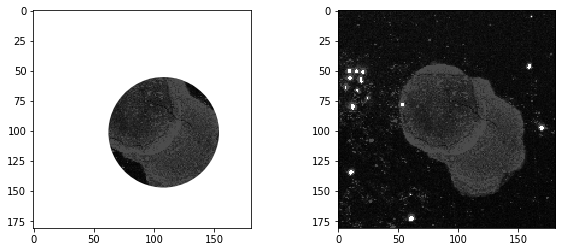

In [156]:

circy,circx,radius,qual = find_circle_coordinates(pic,0,0)
print(circy,circx)
fig, (ax,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
im = ax.imshow(pic, cmap=plt.cm.gray)
circ = create_circle_patches((circx,circy),radius, transform=ax.transData)
ax2.add_patch(circ)
im.set_clip_path(circ)

ax2.imshow(pic,cmap=plt.cm.gray)
plt.show()

In [66]:
pic.apply(circ.contains_ponum

AttributeError: 'AxesSubplot' object has no attribute 'as_matrix'

AttributeError: 'module' object has no attribute 'filter'

In [95]:
circ = create_circle_patches((circx,circy),radius,None)

circ.contains_point((120,75))

False

In [96]:
[value for index,value in np.ndenumerate(pic[:75]) if circ.contains_point(index)]    


[45,
 42,
 55,
 64,
 51,
 43,
 59,
 47,
 37,
 51,
 76,
 51,
 48,
 47,
 44,
 41,
 45,
 70,
 44,
 39,
 51,
 41,
 38,
 38,
 50,
 54,
 53,
 26,
 41,
 39,
 56,
 40,
 39,
 41,
 63,
 37,
 56,
 51,
 44,
 59,
 33,
 44,
 48,
 65,
 51,
 45,
 41,
 43,
 46,
 41,
 58,
 50,
 50,
 43,
 59,
 48,
 41,
 47,
 45,
 40,
 39,
 30,
 33,
 41,
 23,
 41,
 38,
 39,
 49,
 46,
 59,
 56,
 43,
 54,
 62,
 39,
 43,
 47,
 52,
 46,
 46,
 44,
 42,
 65,
 61,
 34,
 65,
 47,
 52,
 48,
 35,
 64,
 31,
 42,
 41,
 36,
 37,
 45,
 44,
 51,
 39,
 45,
 49,
 37,
 49,
 43,
 60,
 42,
 62,
 58,
 45,
 45,
 56,
 49,
 62,
 44,
 38,
 55,
 35,
 51,
 53,
 45,
 45,
 42,
 59,
 32,
 51,
 44,
 45,
 49,
 38,
 41,
 45,
 41,
 47,
 44,
 53,
 44,
 49,
 49,
 58,
 46,
 42,
 49,
 57,
 42,
 57,
 37,
 56,
 47,
 45,
 48,
 67,
 66,
 48,
 42,
 58,
 43,
 59,
 49,
 57,
 52,
 52,
 47,
 35,
 48,
 45,
 43,
 40,
 46,
 48,
 45,
 58,
 53,
 44,
 46,
 49,
 40,
 23,
 28,
 61,
 76,
 59,
 34,
 46,
 42,
 55,
 41,
 69,
 43,
 41,
 49,
 57,
 38,
 57,
 38,
 51,
 46,
 62,
 41,


In [29]:
pic

array([[15,  6, 17, ...,  7, 19, 18],
       [17,  7, 15, ..., 10, 10, 28],
       [ 9, 10, 17, ..., 19, 15, 13],
       ..., 
       [ 7, 13,  8, ..., 12, 10, 12],
       [ 4,  6,  6, ..., 12, 16, 15],
       [11,  3,  7, ..., 17, 28,  6]], dtype=uint8)

In [23]:

# Now apply the transform to the path
newpath = transform.transform_path(path)
# Now you can use this
polygon = matpatches.PathPatch(newpath)

mask = polygon.contains_points(pic) # have mpl figure out which coords are within the contour


AttributeError: 'PathPatch' object has no attribute 'contains_points'

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
ax.add_patch(circ)
plt.show()

RuntimeError: Can not put single artist in more than one figure